In [1]:
from keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
print('train data #: ', len(train_data))
print('test data # ', len(test_data))

train data #:  8982
test data #  2246


In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [12]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [17]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 2.8565 - accuracy: 0.4662 - val_loss: 1.9808 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 1s 40ms/step - loss: 1.6225 - accuracy: 0.6794 - val_loss: 1.4003 - val_accuracy: 0.6950
Epoch 3/20
16/16 [==============================] - 1s 40ms/step - loss: 1.1974 - accuracy: 0.7463 - val_loss: 1.1965 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.9626 - accuracy: 0.7910 - val_loss: 1.0718 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 36ms/step - loss: 0.7937 - accuracy: 0.8270 - val_loss: 1.0172 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.6657 - accuracy: 0.8631 - val_loss: 0.9433 - val_accuracy: 0.8020
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5598 - accuracy: 0.8875 - val_loss: 0.9094 - val_accuracy: 0.8070
Epoch 8/20
16

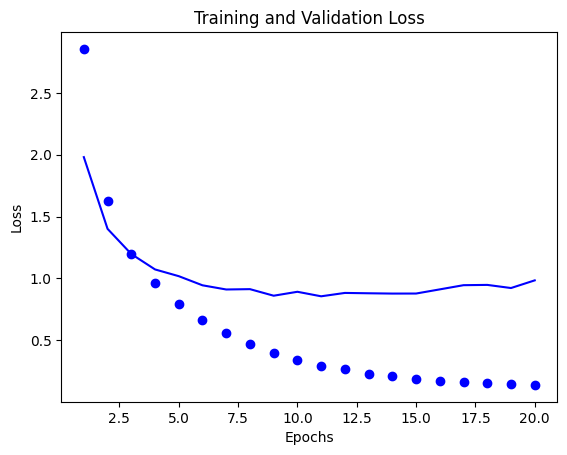

In [20]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

plt.show()

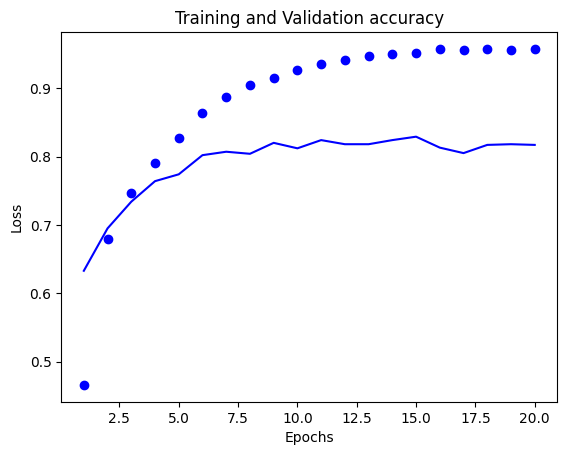

In [21]:
plt.clf()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend

plt.show()

In [22]:
#9 epoch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)

results

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 2.7200 - accuracy: 0.4752 - val_loss: 1.8388 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 1.5579 - accuracy: 0.6774 - val_loss: 1.4023 - val_accuracy: 0.6870
Epoch 3/20
16/16 [==============================] - 1s 39ms/step - loss: 1.2063 - accuracy: 0.7364 - val_loss: 1.2325 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 1s 40ms/step - loss: 0.9906 - accuracy: 0.7878 - val_loss: 1.1295 - val_accuracy: 0.7500
Epoch 5/20
16/16 [==============================] - 1s 39ms/step - loss: 0.8260 - accuracy: 0.8190 - val_loss: 1.0346 - val_accuracy: 0.7710
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.6874 - accuracy: 0.8485 - val_loss: 0.9701 - val_accuracy: 0.7860
Epoch 7/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5787 - accuracy: 0.8781 - val_loss: 0.9240 - val_accuracy: 0.8130
Epoch 8/20
16

[1.142708420753479, 0.7813891172409058]

In [23]:
predictions = model.predict(x_test)

71/71 [==============================] - 1s 3ms/step


In [26]:
print('vector size: ',predictions[0].shape)
print('Sum of vector: ',np.sum(predictions[0]))
print('Class have highest possibility: ',np.argmax(predictions[0]))

vector size:  (46,)
Sum of vector:  0.99999994
Class have highest possibility:  3


In [27]:
# 128 hidden unit
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)

results

Epoch 1/20
16/16 [==============================] - 2s 73ms/step - loss: 2.3343 - accuracy: 0.5130 - val_loss: 1.5551 - val_accuracy: 0.6470
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3071 - accuracy: 0.7115 - val_loss: 1.2192 - val_accuracy: 0.7270
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 0.9808 - accuracy: 0.7868 - val_loss: 1.0688 - val_accuracy: 0.7740
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.7687 - accuracy: 0.8353 - val_loss: 0.9578 - val_accuracy: 0.7970
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6033 - accuracy: 0.8700 - val_loss: 0.9255 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 47ms/step - loss: 0.4669 - accuracy: 0.9005 - val_loss: 0.9086 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.3905 - accuracy: 0.9147 - val_loss: 0.8602 - val_accuracy: 0.8190
Epoch 8/20
16

[1.1977788209915161, 0.7698130011558533]

In [28]:
# 3 hidden layers
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))2 hidden layers, 128 hidden node
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)

results

Epoch 1/20
16/16 [==============================] - 2s 75ms/step - loss: 2.3995 - accuracy: 0.4946 - val_loss: 1.6210 - val_accuracy: 0.6210
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.3570 - accuracy: 0.6956 - val_loss: 1.2372 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 1.0416 - accuracy: 0.7603 - val_loss: 1.0855 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 51ms/step - loss: 0.8319 - accuracy: 0.8073 - val_loss: 0.9850 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6283 - accuracy: 0.8553 - val_loss: 1.0802 - val_accuracy: 0.7630
Epoch 6/20
16/16 [==============================] - 1s 51ms/step - loss: 0.4998 - accuracy: 0.8852 - val_loss: 0.9683 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.3864 - accuracy: 0.9107 - val_loss: 0.9629 - val_accuracy: 0.7940
Epoch 8/20
16

[1.1174476146697998, 0.7880676984786987]

In [31]:
# 3 hidden layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)

results

Epoch 1/20
16/16 [==============================] - 2s 62ms/step - loss: 2.9134 - accuracy: 0.3950 - val_loss: 1.9800 - val_accuracy: 0.5500
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.6581 - accuracy: 0.6353 - val_loss: 1.4588 - val_accuracy: 0.6690
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 1.2871 - accuracy: 0.7139 - val_loss: 1.2644 - val_accuracy: 0.7160
Epoch 4/20
16/16 [==============================] - 1s 35ms/step - loss: 1.0754 - accuracy: 0.7539 - val_loss: 1.1533 - val_accuracy: 0.7340
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 0.9098 - accuracy: 0.7957 - val_loss: 1.0742 - val_accuracy: 0.7540
Epoch 6/20
16/16 [==============================] - 1s 34ms/step - loss: 0.7753 - accuracy: 0.8256 - val_loss: 1.0012 - val_accuracy: 0.7750
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 0.6540 - accuracy: 0.8529 - val_loss: 1.0023 - val_accuracy: 0.7770
Epoch 8/20
16

[1.3263040781021118, 0.7640249133110046]

In [32]:
# 1 hidden layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)

resultsb

Epoch 1/20
16/16 [==============================] - 2s 53ms/step - loss: 2.7091 - accuracy: 0.5494 - val_loss: 1.9210 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.5975 - accuracy: 0.7036 - val_loss: 1.4107 - val_accuracy: 0.7170
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.1897 - accuracy: 0.7607 - val_loss: 1.1883 - val_accuracy: 0.7540
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.9577 - accuracy: 0.8014 - val_loss: 1.0656 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 1s 35ms/step - loss: 0.7960 - accuracy: 0.8368 - val_loss: 0.9865 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.6727 - accuracy: 0.8653 - val_loss: 0.9265 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 35ms/step - loss: 0.5751 - accuracy: 0.8850 - val_loss: 0.8816 - val_accuracy: 0.8170
Epoch 8/20
16

[0.9003514051437378, 0.799198567867279]

In [33]:
# 1 hidden layers
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data=(x_val, y_val))
results = model.evaluate(x_test,one_hot_test_labels)

results

Epoch 1/20
16/16 [==============================] - 2s 84ms/step - loss: 2.2946 - accuracy: 0.5672 - val_loss: 1.5481 - val_accuracy: 0.6720
Epoch 2/20
16/16 [==============================] - 1s 58ms/step - loss: 1.2706 - accuracy: 0.7392 - val_loss: 1.1954 - val_accuracy: 0.7490
Epoch 3/20
16/16 [==============================] - 1s 52ms/step - loss: 0.9445 - accuracy: 0.8053 - val_loss: 1.0342 - val_accuracy: 0.7900
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.7420 - accuracy: 0.8483 - val_loss: 0.9371 - val_accuracy: 0.8090
Epoch 5/20
16/16 [==============================] - 1s 78ms/step - loss: 0.5969 - accuracy: 0.8804 - val_loss: 0.8731 - val_accuracy: 0.8170
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4897 - accuracy: 0.9008 - val_loss: 0.8358 - val_accuracy: 0.8210
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4088 - accuracy: 0.9156 - val_loss: 0.8298 - val_accuracy: 0.8130
Epoch 8/20
16

[0.9292815923690796, 0.8023152351379395]